In [3]:
samp = """19, 13, 30 @ -2,  1, -2
18, 19, 22 @ -1, -1, -2
20, 25, 34 @ -2, -2, -4
12, 31, 28 @ -1, -2, -1
20, 19, 15 @  1, -5, -3"""

In [16]:
from helpers import *
import numpy as np
import torch
import matplotlib.pyplot as plt
from fractions import Fraction as F


In [6]:
parser = Lines() ** Split('@') ** Split(",") ** int


In [108]:
lines = parser.parse(samp)
MINS = np.array([7, 7])
MAXS = np.array([27, 27])


In [337]:
lines = parser.parse(open('p24inp.txt').read())

In [338]:
# let's make it into a 6-matrix:
ORIG_MAT = np.array([[x0, y0, z0, dx, dy, dz] for ((x0, y0, z0), (dx, dy, dz)) in lines])
print("Orig:")
print(ORIG_MAT)


Orig:
[[213004023520250 255007063487325 286351797522218             118
               41             -64]
 [488850102886640 357544262814165 194409329434718             -73
              -83             182]
 [193401607687542 253348355203801 213339230780036             133
               51              98]
 ...
 [228887168122064 289299124463928 231056100711263              40
              -54              52]
 [216144810843746 189822221239713  55965279397952             128
              186             478]
 [153121382540370 212423694777625 126298218734728             225
              254             445]]


In [339]:
DX = ORIG_MAT[:, [3]]
DY = ORIG_MAT[:, [4]]
X0 = ORIG_MAT[:, [0]]
Y0 = ORIG_MAT[:, [1]]
X0Y0 = ORIG_MAT[:, :2]
DXDY = ORIG_MAT[:, 3:5]
ABC = np.hstack([DY, -DX, DY*X0 - DX*Y0])
ROWS = ABC.shape[0]


In [340]:
# Part 1

successes = 0
for e1 in range(ROWS):
    for e2 in range(e1+1, ROWS):
        rows = ABC[[e1, e2]]
        try:
            solvedxy = np.linalg.solve(rows[:,:2], rows[:,2])
            # this gives an (x,y) numpy array of the intersection point
            #solvedxy_col = solvedxy.reshape((2,1))
            # check that T is positive for both lines
            ts = (solvedxy - X0Y0[[e1, e2]]) / DXDY[[e1, e2]]
            # ts should be equal across each row
            assert np.allclose(ts[:, 0], ts[:, 1])

            #print(f"Intersect {e1} {e2} @ {solvedxy}")

            if not np.all(ts > 0):
                #print("but t<0")
                pass
            elif not (np.all(MINS <= solvedxy) and np.all(solvedxy <= MAXS)):
                #print("but out of range")
                pass
            else:
                #print("success")
                successes += 1
        except np.linalg.LinAlgError:
            #print("parallel / no int")
            pass

print(f"Successes: {successes}")


Successes: 0


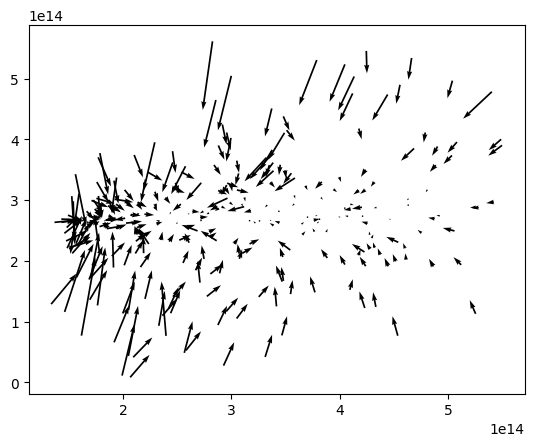

In [341]:
plt.quiver(X0, Y0, DX, DY)

In [112]:
I = numpy.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [403]:
POSS = ORIG_MAT[:, 0:3]
VECS = ORIG_MAT[:, 3:6]

VECS

array([[ 118,   41,  -64],
       [ -73,  -83,  182],
       [ 133,   51,   98],
       [  33,   23,  -23],
       [-171, -128,  102],
       [ 145,  -33,  183],
       [  79,   27,  -39],
       [ -10,  -28,  -46],
       [ 136,  -51,  -19],
       [ -12,    8,   96],
       [  20,   38,   -9],
       [-162, -153,   36],
       [ 186,  236,  289],
       [  -7,   -8,   25],
       [-107, -746, -234],
       [  22,   45,  -15],
       [-101,  -83, -165],
       [ -29,  -29,    6],
       [ 108,  -82,   10],
       [ -62, -436, -345],
       [ 123,  -13,  -27],
       [ -18,   -9,  -10],
       [-207,  -55,  -10],
       [-219, -200,   35],
       [  55, -285, -275],
       [ 107,   83,  721],
       [ -25,  172,  197],
       [ -43,  -60,   29],
       [ -92,  -49,  -45],
       [-130, -369,  343],
       [ 269,   26,  -61],
       [ -25,  -15,  -14],
       [ 147,  116,  117],
       [ -66,  241, -252],
       [ -43,   73,   43],
       [ -56,  -91,  -37],
       [  47,   -7,   33],
 

In [56]:
def skew(vector):
    return np.cross(np.eye(vector.size), vector.reshape(-1))

In [267]:
skew(np.array([1,2,3]))

array([[ 0., -3.,  2.],
       [ 3.,  0., -1.],
       [-2.,  1.,  0.]])

In [272]:
NPZUP = np.array([0,0,1])
NPI = np.eye(3)

def rotmat(target):
    """Given a 'target z-axis', creates a rotation matrix to multiply by, in order to orthographically project along that axis -
    if you then ignore z you get a peek along that axis"""
    axis = norm(np.cross(NPZUP, target))
    cos_theta = (NPZUP @ target) / ((NPZUP @ NPZUP) * (target @ target))
    sin_theta = np.sin(np.arccos(cos_theta))
    #theta = np.arccos(ZUP @ target / ((ZUP @ ZUP) * (target @ target)))
    #theta = 90 deg
    #axis, theta
    

    
    return cos_theta * NPI  +  sin_theta * skew(axis)  +  (1 - cos_theta) * np.outer(axis, axis)

def norm(v):
    return v / np.sqrt(np.dot(v, v))



In [273]:
rm = rotmat(norm(np.array([-3,1,2])))
rm

array([[ 0.58107024,  0.13964325, -0.80178373],
       [ 0.13964325,  0.95345225,  0.26726124],
       [ 0.80178373, -0.26726124,  0.53452248]])

In [343]:
#rm = rotmat(np.array([1,0,0]))
# Choose an INPUT array
INP = np.array([-3, 1, 2])

rm = rotmat(norm(inp))
xs, vs = POSS @ rm, VECS @ rm
#xs, vs
#plt.quiver(xs[:, 0], xs[:, 1], vs[:, 0], vs[:, 1], angles='xy')


DX = vs[:, [0]]
DY = vs[:, [1]]
X0 = xs[:, [0]]
Y0 = xs[:, [1]]
X0Y0 = xs
DXDY = vs
ABC = np.hstack([DY, -DX, DY*X0 - DX*Y0])
ROWS = ABC.shape[0]
ABC

e1=0
e2=1
solutions = []
for e1 in range(ROWS):
    for e2 in range(e1+1, ROWS):

        rows = ABC[[e1, e2]]
        try:
            solvedxy = np.linalg.solve(rows[:,:2], rows[:,2])
            #print(solvedxy)
            solutions.append(solvedxy)
        except np.linalg.LinAlgError:
            pass
            #print("no solve")

allsolns = np.array(solutions)
diffs = allsolns - np.average(allsolns, axis=0)
np.sum(diffs * diffs)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [696]:
TPOSS, TVECS = torch.from_numpy(POSS).to(torch.float64), torch.from_numpy(VECS).to(torch.float64)

#TPOSS = TPOSS / 1e10

ZUP = torch.tensor([0.,0.,1.]).to(torch.float64)
I = torch.eye(3).to(torch.float64)

def torch_skew(vector):
    return torch.tensor([[0., -vector[2], vector[1]], 
                         [vector[2], 0., -vector[0]],
                         [-vector[1], vector[0], 0.]])

def torch_norm(v):
    return v / torch.sqrt(torch.dot(v, v))

def torch_rotmat(target):
    """Given a 'target z-axis', creates a rotation matrix to multiply by, in order to orthographically project along that axis -
    if you then ignore z you get a peek along that axis"""
    target = torch_norm(target)
    axis = torch_norm(torch.cross(ZUP, target))
    cos_theta = (ZUP @ target) / ((ZUP @ ZUP) * (target @ target))
    sin_theta = torch.sin(torch.arccos(cos_theta))    
    return cos_theta * I  +  sin_theta * torch_skew(axis)  +  (1 - cos_theta) * torch.outer(axis, axis)

def torch_loss(inp, verbose=False, allrows=False):
    inp = inp.to(torch.float64)
    rm = torch_rotmat(torch_norm(inp))
    xs, vs = TPOSS @ rm, TVECS @ rm
    
    DX = vs[:, [0]]
    DY = vs[:, [1]]
    X0 = xs[:, [0]]
    Y0 = xs[:, [1]]
    X0Y0 = xs
    DXDY = vs
    ABC = torch.hstack([DY, -DX, DY*X0 - DX*Y0])
    if allrows:
        ROWS = ABC.shape[0]
    else:
        ROWS = 7
    ABC
    
    e1=0
    e2=1
    #batch = torch.cat
    solutions = []
    for e1 in range(ROWS):
        for e2 in range(e1+1, ROWS):
    
            rows = ABC[[e1, e2]]
            try:
                solvedxy = torch.linalg.solve(rows[:,:2], rows[:,2])
                #print(solvedxy.shape, X0Y0.shape)
                ts = (solvedxy - X0Y0[[e1, e2], :2]) / DXDY[[e1, e2], :2]
                #print(ts)
                solutions.append(torch.cat([solvedxy, ts[:, 0]]))
            except torch.linalg.LinAlgError:
                pass
                #print("no solve")

    allsolns = torch.stack(solutions)[:, :2]
    ts = torch.stack(solutions)[:, 2:]
    if verbose:
        print(f"--torch_loss({inp})--")
        print(allsolns)
        print(ts)
    avg = torch.sum(allsolns, axis=0) / allsolns.shape[0]
    diffs = allsolns - avg
    #print(diffs)
    return torch.sum(abs(diffs)) / diffs.shape[0]




In [683]:
torch_loss(torch.tensor([3., 5.0, 1.0]))

tensor(3.0936e+14, dtype=torch.float64)

In [402]:
import math
math.log(1.5749e-14)

-31.78199952371824

In [686]:
best_loss = 1.0e100

for x in range(-20, 20):
    for y in range(-20, 20):
        for z in range(-20, 20):
            t = torch.tensor([x, y, z]).to(torch.float64)
            loss = torch_loss(t)
            if loss < best_loss:
                print(f"{t}: {loss}")
                best_loss = loss

tensor([-20., -20., -20.], dtype=torch.float64): 225815634395948.28
tensor([-20., -20.,   5.], dtype=torch.float64): 219619567943888.75
tensor([-20., -20.,   6.], dtype=torch.float64): 206982993083332.5
tensor([-20., -20.,   7.], dtype=torch.float64): 198716610472368.66
tensor([-20., -20.,   8.], dtype=torch.float64): 196907247475213.84
tensor([-20., -20.,  19.], dtype=torch.float64): 193115011311544.84
tensor([-20., -19.,   8.], dtype=torch.float64): 188482139170294.78
tensor([-20., -19.,   9.], dtype=torch.float64): 187899179858865.44
tensor([-20., -19.,  19.], dtype=torch.float64): 162902418165400.3
tensor([-20., -18.,  18.], dtype=torch.float64): 159545833501976.16
tensor([-20., -18.,  19.], dtype=torch.float64): 152507502132748.5
tensor([-20., -14.,  17.], dtype=torch.float64): 151751145901503.56
tensor([-20., -14.,  18.], dtype=torch.float64): 141368032386920.5
tensor([-20., -14.,  19.], dtype=torch.float64): 134881008359539.05
tensor([-20., -13.,  15.], dtype=torch.float64): 131

In [697]:
start = [-16., -1.0, -10.0]
#start = [-15.9885,  -0.9672, -10.0306]
#start = [-55958.8359,  -3385.9980, -35108.0039]
params = torch.tensor(start, requires_grad=True)


#optimizer = torch.optim.Adam([params], lr=1)
torch_loss(params, verbose=True, allrows=True)

--torch_loss(tensor([-16.,  -1., -10.], dtype=torch.float64, grad_fn=<ToCopyBackward0>))--
tensor([[5.6571e+13, 2.5931e+14],
        [5.8141e+13, 2.5896e+14],
        [5.7791e+13, 2.5904e+14],
        ...,
        [5.8197e+13, 2.5891e+14],
        [5.8103e+13, 2.5909e+14],
        [5.7582e+13, 2.5853e+14]], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor([[4.1860e+11, 9.0800e+11],
        [4.0551e+11, 3.2958e+11],
        [4.0843e+11, 8.4074e+11],
        ...,
        [3.4904e+11, 4.4360e+11],
        [3.4568e+11, 2.1926e+11],
        [4.4167e+11, 2.1705e+11]], dtype=torch.float64,
       grad_fn=<SliceBackward0>)


tensor(1.7643e+12, dtype=torch.float64, grad_fn=<DivBackward0>)

In [688]:
# look for integer values for params which optimize the loss. we are going to explore in the rough direction of 
# our starting params value, but 5x the distance each step

multiplier = 5

def big_step(params):
    params_int = params.to(torch.int)
    best_loss = 1.0e100
    best_params = params
    
    mins, maxs = (params_int - 1) * multiplier, (params_int + 1) * multiplier
    for x in range(mins[0], maxs[0] + 1):
        for y in range(mins[1], maxs[1] + 1):
            for z in range(mins[2], maxs[2] + 1):
                t = torch.tensor([x, y, z]).to(torch.float32)
                loss = torch_loss(t)
                if loss < best_loss:
                    print(f"{t}: {loss}")
                    best_loss = loss
                    best_params = t
    return best_params

for i in range(5):
    params = big_step(params)

tensor([-85., -10., -55.]): 53883055619897.05
tensor([-85., -10., -54.]): 51205433308374.9
tensor([-85., -10., -53.]): 49511427572032.8
tensor([-85., -10., -50.]): 46501665852023.266
tensor([-85., -10., -49.]): 39614389545607.79
tensor([-85., -10., -48.]): 35546500523065.61
tensor([-85., -10., -47.]): 32930209919468.56
tensor([-85., -10., -46.]): 31584717680450.07
tensor([-85.,  -9., -50.]): 30067807612801.99
tensor([-85.,  -9., -49.]): 27554772319887.77
tensor([-85.,  -9., -48.]): 26622120161277.305
tensor([-85.,  -9., -46.]): 21130148282992.887
tensor([-85.,  -9., -45.]): 17456612094350.947
tensor([-85.,  -8., -48.]): 15607776528876.494
tensor([-85.,  -8., -47.]): 12262867639913.371
tensor([-85.,  -8., -46.]): 10132308368605.11
tensor([-85.,  -8., -45.]): 8973715632183.066
tensor([-85.,  -7., -49.]): 7273653330790.192
tensor([-85.,  -7., -48.]): 5938763722356.715
tensor([-85.,  -6., -52.]): 5331992515808.286
tensor([-85.,  -6., -51.]): 2842801377392.3794
tensor([-85.,  -5., -54.]): 1

In [698]:
#params = best_params
best_params = torch.tensor([-52334.,  -3167., -32833.], dtype=torch.float64)
best_params
torch_loss(best_params, verbose=True, allrows=True)

--torch_loss(tensor([-52334.,  -3167., -32833.], dtype=torch.float64))--
tensor([[5.8289e+13, 2.5936e+14],
        [5.8290e+13, 2.5936e+14],
        [5.8291e+13, 2.5936e+14],
        ...,
        [5.8290e+13, 2.5936e+14],
        [5.8290e+13, 2.5936e+14],
        [5.8288e+13, 2.5936e+14]], dtype=torch.float64)
tensor([[4.0503e+11, 9.1789e+11],
        [4.0503e+11, 3.3029e+11],
        [4.0502e+11, 8.2282e+11],
        ...,
        [3.4770e+11, 4.4368e+11],
        [3.4768e+11, 2.1912e+11],
        [4.4368e+11, 2.1911e+11]], dtype=torch.float64)


tensor(2.3617e+11, dtype=torch.float64)

In [705]:
# ok, now let's try to actually answer the question
# it seems that the unrotated "z-axis-intersection-point" is
# [ 5828.8525, 25935.9316, ??]
# but we also have a vector we would like to intersect with every line
# [-1308217.,   -79160.,  -820759.] (roughly)
# vector + first line makes a plane, then we can intersect that plane with next line

#params, best_params
invec = numpy.array([int(x) for x in best_params], dtype=np.int64)
#invec
# cross product 
lvec = VECS[0].astype(np.int64)
lpoint = POSS[0].astype(np.int64)
#lvec.astype(object)
#invec, lvec
# normal_to_plane
normal_to_plane = numpy.cross(invec, lvec)
#xp
#lpos = POSS[0]
D = -sum([int(normal_to_plane[i]) * int(lpoint[i]) for i in range(3)])
D

# The plane is in Ax + By + Cz + D = 0 form

2019589458496157481884

In [733]:
# next step - intersect this plane with next line let's say POSS[1]
# usese normal_to_plane and D from prior step


def find_intersect_point_and_t(vecix):
    
    # Redefining variables to perform calculations after state reset
    l2vec = VECS[vecix].astype(object) #[-73, -83, 182]
    l2pt = POSS[vecix].astype(object)  #[488850102886640, 357544262814165, 194409329434718]
    n2p = normal_to_plane.astype(object)
    
    # Set up the equation and solve for t
    # Equation form: Ax + By + Cz + D = 0 where x, y, z are from line equation x = L2O_x + L2V_x * t, etc.
    # 38717359(L2O_x + L2V_x * t) - 180575450(L2O_y + L2V_y * t) - 44296017(L2O_z + L2V_z * t) + D_plane = 0
    
    # Coefficients for t
    A_t = n2p[0] * l2vec[0] + n2p[1] * l2vec[1] + n2p[2] * l2vec[2]
    # Constant term
    B_t = n2p[0] * l2pt[0] + n2p[1] * l2pt[1] + n2p[2] * l2pt[2] + D
    
    # Solve for t
    t = -B_t / A_t
    
    intersection_point = [l2pt[i] + t * l2vec[i] for i in range(3)]
    return intersection_point, t

INTERSECTS = [find_intersect_point_and_t(x) for x in range(1, ABC.shape[0])]


[([421843844129641.4, 281359064501413.16, 361466029349426.9],
  917893955575.3234),
 ([237329798684895.7, 270192999871959.2, 245707371514928.2],
  330287150356.0429),
 ([391977632000702.8, 279551272452010.44, 342730507062318.56],
  822820474368.2368),
 ([403253482089922.25, 280233537539017.12, 349805070257430.0],
  858700240737.7645),
 ([452411559676485.0, 283208411678862.56, 380645311257635.4],
  1015250365449.4066),
 ([232967928170723.72, 269926516122644.38, 242981137915362.25],
  316309079202.19885),
 ([240519190630121.34, 270386002481255.3, 247708329676688.3],
  340446222395.667),
 ([420510758783200.5, 281277474551958.8, 360633428693614.3],
  913664392134.8271),
 ([410688317518398.2, 280682971086141.2, 354471477878995.4],
  882394413886.1499),
 ([404868959629726.6, 280331113984225.03, 350819330968153.3],
  863860848205.6327),
 ([354732711460652.94, 277297297878358.9, 319364382988271.8],
  704179679676.7719),
 ([439182249262277.6, 282407358278720.5, 372347538949783.0],
  97313051843

In [754]:
ORIG = INTERSECTS[264][0]

def pdiff(p1, p2):
    return [p1[x]-p2[x] for x in range(3)]

deltas = []
for (xyz, _) in INTERSECTS:
    diffs = pdiff(xyz, ORIG)
    # here, all the diffs/invec are all close to each other so we can just use the average
    dxs = np.average(diffs / invec)
    deltas.append(dxs)

# so this is the count of "positive invecs" from ORIG to each of INTERSECT
#deltas
#deltas
#deltas.index(min(deltas))

In [763]:
sdeltas = list(sorted(deltas))
adjdiffs = list(sorted([y - x for (x, y) in zip(sdeltas, sdeltas[1:])]))
adjdiffs
#mindiff = 
#[(x/adjdiffs[0]/adjdiffs[1],) for x in sdeltas]

[116591.45664453506,
 150315.30530929565,
 278956.2379567623,
 318017.91811180115,
 415033.98564720154,
 437226.75785446167,
 462756.45655441284,
 478306.4869585037,
 489262.8038352728,
 681325.8908040524,
 729579.2798728943,
 865306.9017796516,
 906481.0811796188,
 1021573.7770926952,
 1173092.1255674362,
 1208825.3195223808,
 1212683.5600295067,
 1241708.7604875565,
 1253762.0535217524,
 1265897.120218277,
 1319351.7042808533,
 1386039.2111401558,
 1386750.3749899864,
 1439774.829498291,
 1758286.0770697594,
 1862305.8729270697,
 1902846.0751256943,
 1942866.865892887,
 2218815.8144898415,
 2313783.1230614185,
 2383555.356314659,
 2436812.9757814407,
 2591320.4321579933,
 2755209.816151619,
 2776692.6403212547,
 2814615.397808075,
 2835214.042057991,
 2836343.314311981,
 2932703.4063043594,
 3014493.2356624603,
 3086718.9901943207,
 3203874.3684043884,
 3221393.261940956,
 3223079.4566550255,
 3224092.05615139,
 3306264.5331525803,
 3388714.048342228,
 3476959.026515007,
 3489415.506

In [773]:


import z3

#, p0x, p0y, p0z, t0, p1x, p1y, p1z, t1, p2x, p2y, p2z, t2
vx, vy, vz = z3.Ints("vx vy vz")
ox, oy, oz = z3.Ints("ox oy oz")

s = z3.Solver()



for i in range(3,6):
    it = z3.Int(f"t{i}")
    s.add(POSS[i][0] + it * VECS[i][0] == ox + it * vx)
    s.add(POSS[i][1] + it * VECS[i][1] == oy + it * vy)
    s.add(POSS[i][2] + it * VECS[i][2] == oz + it * vz)

s.check()

s.model()

[ox = 133619443970450,
 t5 = 1015271081159,
 t3 = 822793994221,
 vz = 197,
 vy = 19,
 oy = 263917577518425,
 oz = 180640699244168,
 t4 = 858704699558,
 vx = 314]

In [583]:
## old stuff below

In [489]:
loss = torch_loss(params)  # Compute the loss function
bestloss = loss

for i in range(1000):  # Run 100 iterations
    optimizer.zero_grad()   # Clear gradients from the previous step
    loss = torch_loss(params)  # Compute the loss function
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters based on gradients

    # Optional: Print the parameters and loss
    
    if loss < bestloss:
        print(f'Iteration {i+1}: loss = {loss.item()}, newparams = {params}')
        bestloss = loss

    if loss < 1e-5:
        break
    


Iteration 27: loss = 0.02120535634458065, newparams = tensor([-55958.7539,  -3386.0554, -35108.0781], requires_grad=True)
Iteration 75: loss = 0.0054175965487957, newparams = tensor([-55958.8672,  -3386.0042, -35107.9453], requires_grad=True)


In [480]:
ps = torch.tensor([-1598.8239,   -96.7428, -1003.0859])

In [494]:
frac = ps[1]/ps[0]
frac, torch.floor(frac)

(tensor(0.0605), tensor(0.))

In [541]:
def contfrac(x):
    result = []
    for part in range(4):
        fl = torch.floor(x)
        result.append(int(fl.item()))
        if abs(x - fl) < 0e-10:
            break
        x = 1.0 / (x - fl)

    return result

contfrac(torch.tensor([0.0605]))

[0, 16, 1, 1]

In [542]:
from fractions import Fraction as F

#F(0, 1) + F(1, 16 + F(1, 1 + F(1, 1 + F(1, 8))))

def excontf(cf):
    whole = F(cf[0], 1)
    rem = F(0, 1)
    for part in cf[:0:-1]:
        rem = F(1, part + rem)

    return whole + rem

assert excontf([0, 16]) == F(1, 16)
excontf(contfrac(torch.tensor([0.0605])))

Fraction(2, 33)

In [548]:
sum([excontf(contfrac(x)) for x in torch.tensor([-15.9885,  -0.9672, -10.0306])])

Fraction(-175769059, 6513342)

In [546]:
7162745/128

55958.9453125